In [50]:
import numpy as np
import sympy
from sympy import S, Symbol, symbols, solveset, integrate, Integral, diff, intersection, Interval, plot_parametric, plot_implicit, And, E, latex, plot, Intersection
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import exp as Exp
from sympy import log as Log
from sympy import pi as Pi
from sympy.sets.sets import FiniteSet
from sympy.core.relational import Equality
from sympy import AtomicExpr
import matplotlib.pyplot as plt
from IPython.display import Latex

## Занятие 12
## Математический анализ
## Применение интегралов для вычисления объема тела вращения
### Задание 1
Вычислить объем тела вращения около оси ОX фигуры, ограниченной графиком $y = \sin x$, $0 \le x \le \pi$ и осью ОХ. Построить график с помощью plot из sympy, названием графика (title) сделать формулу для вычисления объема по образцу Примера 1, например
$$
\pi\int\limits_0^1 (x - x^2)^2\,dx = \frac{\pi}{30},
$$
только формула должна соответствовать Заданию 1. Использовать latex, mode='inline'.

<IPython.core.display.Latex object>

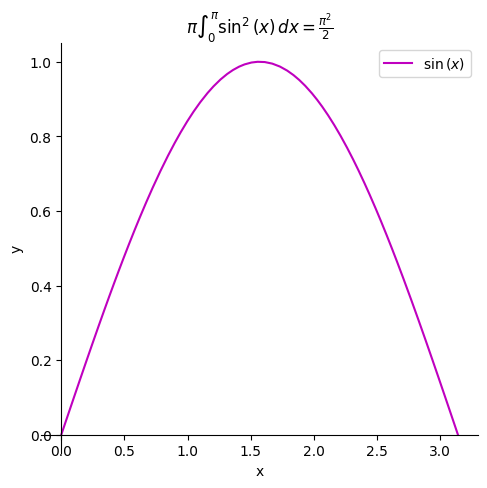

In [60]:
from sympy.parsing.latex import parse_latex

x: Symbol = Symbol('x', positive=True, real=True)
y: Sin = Sin(x)
roots: FiniteSet = Intersection(solveset(y, x, domain=S.Reals), Interval(0, Pi))
a: AtomicExpr = min(roots)
b: AtomicExpr = max(roots)
V_OX = Pi*Integral(y**2, (x, a, b))
eq: Equality = sympy.Eq(V_OX, V_OX.doit())
display(Latex(f"$Объём: {latex(eq)}$"))
p = plot(
    y,
    (x, 0, Pi),
    title=r"$\pi \int_{0}^{\pi} \sin^{2}{\left(x \right)} \,dx = \frac{\pi^{2}}{2}$",
    label='$' + latex(y) + '$',
    line_color='m',
    ylabel='y',
    xlabel='x',
    size=(5, 5),
    legend=True,
    show=False
)
p.show()

### Задание 2.
Вычислить объем тела, получающегося вращением вокруг ОХ астроиды 
$$
\left\{
\begin{matrix}
x = \cos^3 t\\
y = \sin^3 t
\end{matrix}
\right.
$$

###### Указание.
Пределы интегрирования $\pi, 0$, поскольку $\cos^3 t$ убывает на $[0, \pi]$.

In [67]:
t = Symbol('t', positive=True, real=True)
x = Cos(t)**3
y = Sin(t)**3
V_OX = Pi * Integral(y**2*x.diff(t), (t, Pi, 0))
V_OX_val = V_OX.doit()
display(Latex(f"$Объём: {latex(sympy.Eq(V_OX, V_OX_val))}$"))
display(Latex(fr"$\text{{Приблизительное значение: }}{round(V_OX_val, 4)}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 3.
Найти объем тела, которое получается вращением кривой $r = a\cos^2\phi$, $0 \le \phi \le \pi$, вокруг полярной оси.
Построить график при $a = 1$ в полярной системе координат, воспользоваться функцией polar из matplotlib.pyplot.

<IPython.core.display.Latex object>

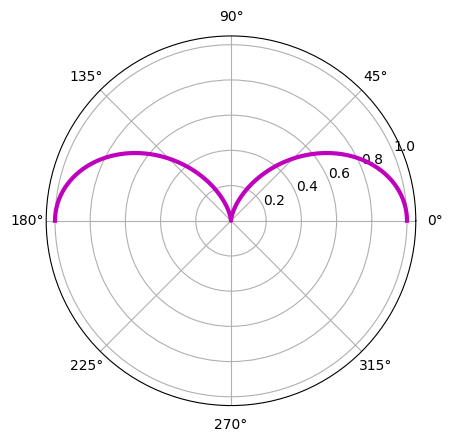

In [89]:
a, phi = symbols(r"a \phi", positive=True, real=True)
r = a * Cos(phi)**2

with sympy.evaluate(False):
    V_OX = S(2) / 3 * Pi * Integral(r**3*Sin(phi), (phi, 0, Pi))
display(Latex(f"$Объём: {latex(sympy.Eq(V_OX, V_OX.doit()))}$"))

Phi = np.linspace(0, np.pi, 256)
R = np.cos(Phi) * np.cos(Phi)
plt.polar(
    Phi,
    R,
    color='m',
    lw=3
)
None

### Задание 4.
Вычислить объем тела, образованного вращением около оси ОY фигуры, ограниченной параболой $y^2 = 2px$, прямой $x=\frac{p}{2}$, $p > 0$ - параметр и осью ОY. Изобразить вращаемую фигуру с помощью plot_implicit.

###### Указание.
Вращаемая фигура симметрична относительно оси OX, поэтому можно вычислить объем фигуры, получающейся вращением верхней ветви параболы, а затем этот объем удвоить.

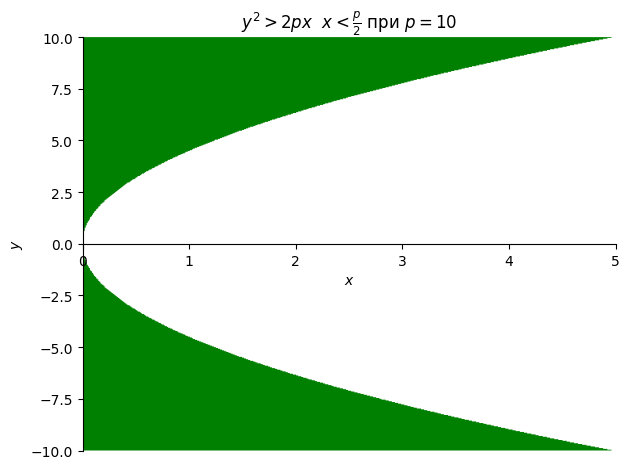

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [125]:
x, y = symbols("x y", positive=True, real=True)

p = S(10)
plot_implicit(
    sympy.And(y**2 > 2*p*x, x < p / 2), (x, 0, p/2), (y, -p, p),
    title=r"$y^{2} > 2 p x$  $x < \frac{p}{2}$ при $p = 10$",
    line_color='g'
)

p = Symbol('p', positive=True, real=True)
y_max = ((2*p*x)**S.Half).subs({x: p / 2})
display(Latex(fr"$\text{{Выше оси OX график y(x) ограничен сверху прямой }}y = {y_max}$"))
x = (y**2)/(2*p)
V_OY = Pi*Integral(x**2, (y, 0, p))
V_OY_val = V_OY.doit()
display(Latex(fr"$\text{{Выше оси OX объём: }}{latex(sympy.Eq(V_OY, V_OY_val))}$"))
display(Latex(fr"$\text{{Объём всей фигуры: }}{latex(V_OY_val * 2)}$"))

### Задание 5.
Вычислить объем тела, образованного вращением около оси ОY фигуры, ограниченной $y = e^x$, прямой $y=e$, и прямой $y = e^2$. 

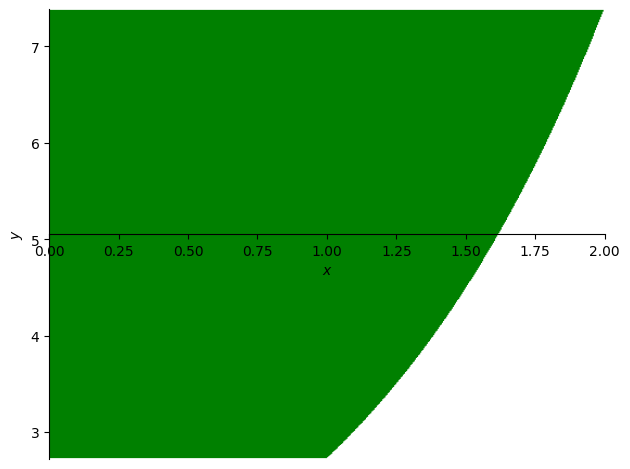

<IPython.core.display.Latex object>

In [144]:
x, y = symbols("x y", positive=True, real=True)
plot_implicit(
    sympy.And(y > E**x, y > E, y < E**2),
    (x, 0, 2),
    (y, E, E**2),
    line_color='g'
)

x = Log(y)
V_OY = Pi*Integral(x**2, (y, E, E**2))
display(Latex(fr"$\text{{Объём фигуры: }}{latex(sympy.Eq(V_OY, V_OY.doit()))}$"))

### Индивидуальное задание
Вычислить объем тела, образованного при вращении области между графиками функций 
$f_1(x)$ и  $f_2(x)$. 

# Вариант 50

$f(x) = cos (5x)$

$g(x) = cos (4x)$

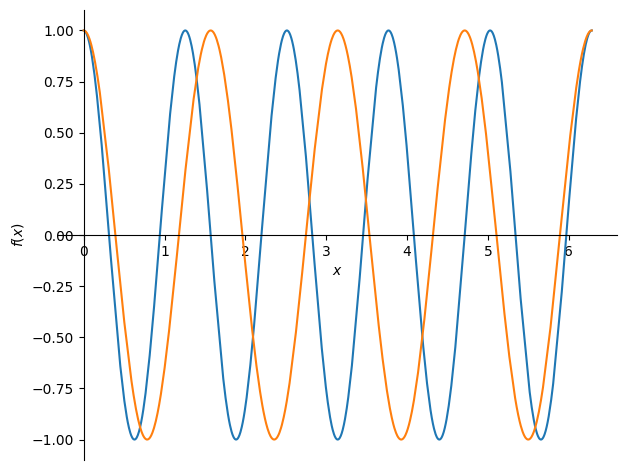

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [173]:
x = Symbol('x', positive=True, domain=S.Reals)
a = S(0)
b = 2*Pi
f = Cos(5*x)
g = Cos(4*x)
p = plot(f, (x, a, b), show=False)
p.extend(plot(g, (x, a, b), show=False))
p.show()

roots_raw = Intersection(solveset(f - g, x, domain=S.Reals), Interval(a, b))
roots = FiniteSet(*(sympy.simplify(root) for root in roots_raw))

# Подсчёт площади по частям на отрезках, т.к. на разных
# отрезках cos(4x) может быть и больше, и меньше cos(5x)
V_OY = S(0)
roots_list = sorted(roots)
for left_border, right_border in zip(roots_list, roots_list[1:]):
    middle = (left_border + right_border) / 2
    f_middle = f.subs({x: middle})
    g_middle = g.subs({x: middle})
    functs_difference = f - g if f_middle > g_middle else g - f
    
    V_OY += 2*Pi*Integral(x*functs_difference, (x, left_border, right_border))

V_OY_val = sympy.simplify(V_OY.doit())
display(Latex(f"$Объём: {latex(V_OY_val)}$"))
display(Latex(fr"$\text{{Приблизительное значение: }}{round(V_OY_val, 4)}$"))